## Python statistics essential training - 03_01_visualization

Standard imports

In [9]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
from ipywidgets import interact, widgets
%matplotlib inline
import re
import mailbox
import csv

data comes from https://www.gapminder.org/data/

In [4]:
gapminder = pd.read_csv('gapminder.csv')

In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
gapminder.loc[0:200:20]
# showing 0:200 index, with interval 20

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
100,Albania,1954,Europe,1382881.0,56.59,84.829,6.31,2108.0,5.771389
120,Albania,1974,Europe,2358467.0,69.35,90.082,4.54,4177.0,11.436003
140,Albania,1994,Europe,3140634.0,73.60,96.540,2.77,3457.0,9.464750
160,Albania,2014,Europe,2889676.0,77.90,98.560,1.78,10160.0,27.816564
180,Algeria,1953,Africa,9405445.0,43.96,73.758,7.65,4077.0,11.162218


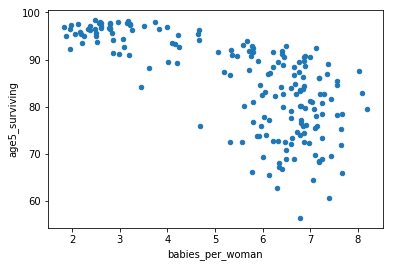

In [8]:
gapminder[gapminder.year==1964].plot.scatter('babies_per_woman','age5_surviving')

In [124]:
def plotyear( year) :
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population # to make the dots larger if the population is larger
    colors = data.region.map ({'Africa' : 'skyblue','Europe': 'gold','America':'palegreen','Asia':'coral'}) # type of this color is series
    colors = np.array(colors) # change the type of 'colors' from series to array, to use it in the plt.scatter as a parameter
    plt.figure(figsize=(12,9))  #set the size of the figure, it must be done before the scatter plot drawn
    plt.scatter (data = data , x= data['babies_per_woman'], y= data['age5_surviving'],
                 s = area ,linewidths =1 , alpha = 0.85, c = colors,edgecolors='k'
                ) 

    plt.axis(ymin = 50, ymax = 105, xmin = 0, xmax = 8)   # set the range of x and y
    plt.xlabel('Babies per woman')
    plt.ylabel('% children alive at 5')
    

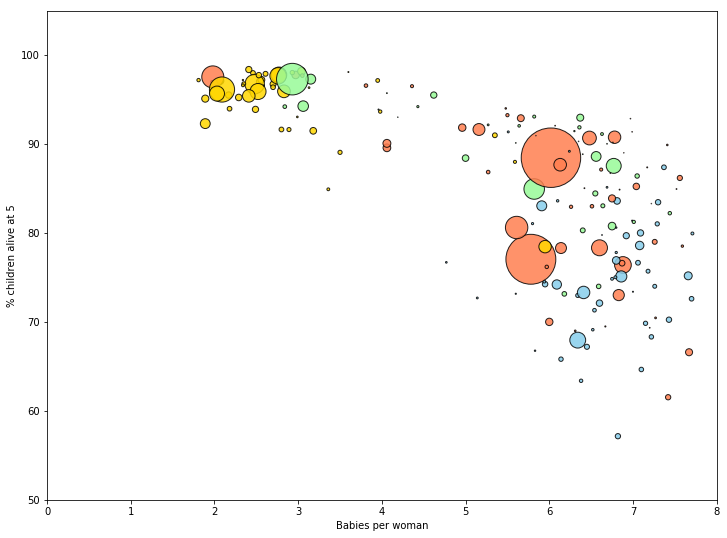

In [125]:
plotyear(1965)

## Scatter plot of natality and mortality of the whole world from 1950-2015
### color map : {'Africa' : 'skyblue','Europe': 'gold','America':'palegreen','Asia':'coral'}

In [119]:
# use Jupyter's notebook's ipwidget, specifically the method, interact
interact(plotyear,year=widgets.IntSlider(min=1950,max=2015,step=1))

interactive(children=(IntSlider(value=1950, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>